In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.interpolate import interp1d
from scipy.integrate import quad

from GaussianCovariance import *

In [2]:
# Read the input power spectrum
k_array, pk_array = np.genfromtxt("pk_0p9.dat", unpack=True)

# Interpolate the power spectrum
interp_pk = interp1d(k_array, pk_array, kind="cubic", fill_value="extrapolate")

In [4]:
rad_edges = np.linspace(5, 180, 176)
r_bins = (rad_edges[:-1] + rad_edges[1:] ) * 0.5
n_bins_r = len(r_bins)
l_list = [0]
n_data_points = n_bins_r * len(l_list)

In [8]:
# Set the survey parameters
volume = 3780**3 #Lightcone volume
n_particles = 110321755 #Lightcone N particles
number_density = n_particles/volume
number_density

0.002042611452009985

In [16]:
# Set the clustering model
b1 = 1.3679 # Target xi linear bias
f = 0.865 # Target redshift linear growth rate
beta = f/b1

p_k_mu = lambda k, mu : (b1 + f * mu**2) **2 * interp_pk(k)

In [17]:
xi_covariance = TwoPointGaussianCovariance(rad_edges, l_list, deg=51, deg_k=10)

Computing Bessels functions...
Done!


In [18]:
cov = xi_covariance(p_k_mu, volume, number_density)

Computing tabulated sigma squared...
Done!


In [19]:
std = np.sqrt(np.diagonal(cov))
corr = cov / np.outer(std, std)

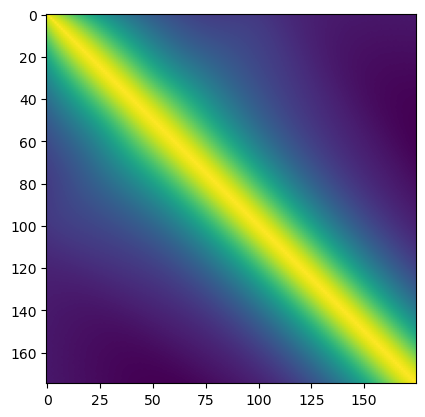

In [20]:
plt.imshow(corr)


In [21]:
icov = np.linalg.inv(cov)